# COGS 108 - Traffic Accident Analysis for the US

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this project, our group wanted to explain how different external factors such as weather conditions, time of day, road type, etc. affected the probability of traffic accidents and how these traffic accidents could delay traffic in different cities. In order to answer our research question, we utilized traffic accident data from 2016-2020 and merged it with population data from the U.S. Census Bureau in 2016. We performed statistical analyses that determined whether the probability of traffic accidents were significantly changed by weather conditions and if delay in traffic is significantly affected by accidents in certain population densities. Our results show that traffic accidents are directly correlated with the population densities and there are significantly more accidents on the west and easts coasts of the country, where not only there is a higher population density but heavier weather conditions.

# Names

- Alan Cao
- Kurtis Nguyen
- Nick Ehsani
- Derek Zhu
- Edward Yang

<a id='research_question'></a>
# Research Question

Which external factors (weather conditions, time, road type) are leading contributors to traffic accidents and to what extent do they delay traffic with respect to the population density of the area?

<a id='background'></a>

## Background & Prior Work

As the second largest consumer of automobiles in the world, the United States has the leading rate of traffic accidents in the world with over 2.21 million accidents recorded in 2018 compared to its closest competitor Japan with only 499,232 road accidents in 2018[1]. Following a general decline in road traffic-related injuries and fatalities, between 2011 and 2017 the United States witnessed a 530,000 incident increase in road traffic injuries, as well as fatalities increasing by about 5,000. While traffic accident rates continue to increase every year, there is also an increase in seat-belt usage, usage of hand-held devices while driving, total vehicles in operation, and the number of licensed drivers.[2] One study that was found at a cross section of an entrance of merging roads, speed limit highly affects the risk of collisions and lowering it would increase road safety.[3] Further, according to another study, we found that more than 30% of vehicle crashes occurred wih unfavorable road/ weather conditions such as wet pavement, rain, or fog.[4] Similarly, it also believed that driving at night This leads us to wonder whether external factors such as weather/ road conditions and the time of day also will have an effect on the number of road accidents.  We want to evaluate what can be done to increase traffic safety and decrease road accidents related to external factors and traffic.

Links:
1. https://www.moneycontrol.com/news/photos/technology/auto/countries-with-the-highest-number-of-road-accidents-find-out-where-india-stands-6253921.html
2. https://www.driverknowledge.com/road-accidents-usa/ 
3. https://link.springer.com/article/10.1140/epjb/e2017-70695-5 
4. https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm

# Hypothesis


We hypothesize that external factors (poor weather conditions, nighttime, bad roads) in traffic accidents of the same severity increases traffic delay in areas with higher population densities. Similarly, we hypothesize that the opposite (good weather conditions, daytime, good roads) results in no increase in traffic delay for smaller population densities.

# Dataset(s)

Since we have multiple datasets, we will join the datasets by the common variable of geographic location. Since both datasets offer locations (car accidents by latitude/ longitude and population density by city) we could combine in this way in order to develop a more fine-grained analysis per city. The ideal dataset for this question would be a dataset that includes statistics about car accidents including where it occurred (city, road type) and the time and weather conditions at the time. Further, the severity of the accident should also be reported in terms of the overall time and length of the traffic caused. Along with that, the dataset would also include the population density of the area near the accident in order to evaluate whether population density also contributes to the severity of the accident. The data should be collected by the US government since we are restricting our project to traffic accidents in the US for at least the past three years in order to get a comprehensive overview of all the traffic accidents that have occurred (~1.5M observations). This data is preferably stored in a csv or similarly structured dataset.

1. 
    - Dataset Name: US Accidents (updated) A Countrywide Traffic Accident Dataset (2016 - 2020)
    - Link to the dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents
    - Number of observations: ~1.5M accident records
    - Description: This dataset contains traffic accidents for the past four years along with statistics about where the accident occurred, time and weather conditions, and severity. 

2. 
    - Dataset Name: Population Density for U.S. Cities Statistics  
    - Link to the dataset: https://www.governing.com/archive/population-density-land-area-cities-map.html
    - Number of observations: ~20,000 cities
    - Description: This dataset contains the population and sizes of various cities

# Setup

In [ ]:
# !pip install descartes
# !pip install geopandas
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install lxml

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import lxml.html as lh
from unicodedata import normalize
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
from IPython.display import Image

# Data Cleaning

In [2]:
df1 = pd.read_csv('Accidents.csv')
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [3]:
# Extract table from website
table_gov = pd.read_html('https://www.governing.com/archive/population-density-land-area-cities-map.html')
df2 = table_gov[0]
df2.head()

,City,Population Density (Persons/Square Mile),2016 Population,Land Area (Square Miles)
0,"New York, New York",28211,8537673,303
1,"Los Angeles, California",8484,3976322,469
2,"Chicago, Illinois",11883,2704958,228
3,"Houston, Texas",3842,2303482,600
4,"Phoenix, Arizona",3126,1615017,517


In [4]:
# Drop these columns because we aren't using them in our analysis
df1 = df1.drop(['ID','Description','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
df1 = df1.drop(['Street', 'Number', 'Side', 'Country', 'Airport_Code'], axis=1)
df1 = df1.drop(['End_Lat', 'End_Lng', 'County', 'Zipcode', 'Timezone', 'Weather_Timestamp'], axis=1)
df1.head()
print(list(df1.columns)) # The list of columns we have left for analysiss

['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']


In [5]:
df1.replace({True: 1, False: 0}, inplace=True) # Convert True/False -> 1/0

# Get accident duration as seconds and remove start and end time columns
df1['Duration(minutes)'] = (pd.to_datetime(df1['End_Time']) - pd.to_datetime(df1['Start_Time'])).dt.total_seconds().astype(int)/60
df1 = df1.drop(['End_Time', 'Start_Time'], axis=1)
df1 = df1.dropna(axis=0) # Drop all null/na values

# Drop population and land area
df2 = df2.drop(df2.columns[[2,3]], axis=1) 

In [6]:
state_initial = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'}

temp = set(df2['City'])
remove = set()

# Remove cities from df1 that aren't in df2
df1 = df1.reset_index()
for index, row in df1.iterrows():
    check = row['City'] +', ' + state_initial[row['State']]
    if check not in temp:
        remove.add(index)
        
df1 = df1.drop(list(remove), axis=0)
df1 = df1.drop('index', axis=1)
df1 = df1.reset_index()
df1 = df1.drop('index', axis=1)
df1

,Severity,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(minutes)
0,3,39.172393,-84.492792,0.500,Cincinnati,OH,37.0,29.8,93.0,29.69,...,0,0,0,0,0,0,0,0,Day,360.000000
1,2,41.375310,-81.820170,0.521,Cleveland,OH,33.1,30.0,92.0,29.63,...,0,0,0,0,0,0,0,0,Day,360.000000
2,2,39.192880,-84.477230,0.307,Cincinnati,OH,33.8,29.6,100.0,29.66,...,0,0,0,0,0,0,0,0,Day,360.000000
3,2,41.473900,-81.704233,0.070,Cleveland,OH,33.1,24.4,96.0,29.59,...,0,0,0,0,0,0,0,0,Day,360.000000
4,3,40.026640,-82.994400,0.999,Columbus,OH,33.8,27.0,100.0,29.63,...,0,0,0,0,0,0,0,0,Night,360.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524448,2,33.741700,-117.837090,0.443,Tustin,CA,75.0,75.0,60.0,29.74,...,0,0,0,0,0,0,0,0,Day,28.516667
524449,2,34.002480,-117.379360,0.543,Riverside,CA,86.0,86.0,40.0,28.92,...,0,0,0,0,0,0,0,0,Day,28.600000
524450,2,32.766960,-117.148060,0.338,San Diego,CA,70.0,70.0,73.0,29.39,...,0,0,0,0,0,0,0,0,Day,26.883333
524451,2,33.775450,-117.847790,0.561,Orange,CA,73.0,73.0,64.0,29.74,...,0,0,0,0,0,0,0,0,Day,28.466667


In [7]:
# Reduces set of wind directions and converts it to a float value to calculate std
def standardize_wind_direction(wind_direction):
    # Possible wind directions: North, East, South, West, Variable, Calm
    abbreviation = wind_direction[0]
    
    if abbreviation == 'N':
        return 1
    elif abbreviation == 'E':
        return 2
    elif abbreviation == 'S':
        return 3
    elif abbreviation == 'W':
        return 4
    elif abbreviation == 'V':
        return 5
    elif abbreviation == 'C':
        return 6
    
df1['Wind_Direction'] = df1['Wind_Direction'].apply(standardize_wind_direction)

Traffic that occurs for longer than 1 days doesn't make sense, so we interpret those as outliers

In [8]:
df1 = df1[df1['Duration(minutes)']<1440]
# df1 = df1.reset_index()
df1['Duration(minutes)'].describe()

count    521144.000000
mean        140.682541
std         176.040945
min           5.216667
25%          34.966667
50%          80.233333
75%         151.470833
max        1438.000000
Name: Duration(minutes), dtype: float64

In [9]:
sev1 = df1[df1['Severity']==1]
prop_df = sev1['Duration(minutes)']
prop_df.describe()

count    18696.000000
mean        39.277347
std         25.137453
min         15.000000
25%         15.000000
50%         34.966667
75%         45.000000
max        820.000000
Name: Duration(minutes), dtype: float64

In [10]:
sev2 = df1[df1['Severity']==2]
prop_df = sev2['Duration(minutes)']
prop_df.describe()

count    449335.000000
mean        154.576921
std         183.255090
min           5.216667
25%          53.016667
50%          96.316667
75%         162.991667
max        1438.000000
Name: Duration(minutes), dtype: float64

In [11]:
sev3 = df1[df1['Severity']==3]
prop_df = sev3['Duration(minutes)']
prop_df.describe()

count    37611.000000
mean        47.331867
std         67.674804
min         11.183333
25%         28.183333
50%         29.616667
75%         34.966667
max       1319.300000
Name: Duration(minutes), dtype: float64

In [12]:
sev4 = df1[df1['Severity']==4]
prop_df = sev4['Duration(minutes)']
prop_df.describe()

count    15502.000000
mean        86.731591
std        120.418493
min          6.600000
25%         28.483333
50%         29.616667
75%         79.966667
max       1437.833333
Name: Duration(minutes), dtype: float64

Since we want to only compare within the same severity setting and since we observe that severity 2 contains more than 85% of the overall traffic that occurred, we only use severity 2 traffice accidents in our analysis.

In [13]:
df1 = df1[df1['Severity']==2]
df1 = df1.reset_index()
df1 = df1.drop('index', axis=1)

In [14]:
# We want to limit the number of weather conditions to a smaller unique set since a lot of the weather conditions are similar
def standardize_weather_condition(weather_condition):
    if 'Rain' in weather_condition or 'Drizzle' in weather_condition or 'Showers' in weather_condition or 'Precipitation' in weather_condition:
        return 'Rain'
    elif 'Snow' in weather_condition or 'Wintry Mix' in weather_condition:
        return 'Snow'
    elif 'Cloudy' in weather_condition or 'Clouds' in weather_condition or 'Overcast' in weather_condition:
        return 'Cloudy'
    elif 'Windy' in weather_condition:
        return 'Windy'
    elif 'Thunder' in weather_condition or 'T-Storm' in weather_condition or 'Tornado' in weather_condition:
        return 'Storm'
    elif 'Mist' in weather_condition or 'Fog' in weather_condition or 'Haze' in weather_condition or 'Dust' in weather_condition or 'Smoke' in weather_condition:
        return 'Foggy'
    elif 'Ice' in weather_condition or 'Hail' in weather_condition or 'Sleet' in weather_condition:
        return 'Hail'
    elif 'Clear' in weather_condition:
        return 'Fair'
    else:
        return weather_condition
    
df1['Weather_Condition'] = df1['Weather_Condition'].apply(standardize_weather_condition)

In [15]:
df1['Weather_Condition'].unique()

array(['Snow', 'Cloudy', 'Rain', 'Fair', 'Foggy', 'Hail', 'Storm',
       'Windy'], dtype=object)

In [16]:
y = df1['Duration(minutes)']
x = [0]*len(y)
for index, row in df1.iterrows():
    location = row['City'] +', ' + state_initial[row['State']]
    temp = df2.loc[df2['City']==location]['Population Density (Persons/Square Mile)']
    x[index] = temp.values[0]
df1['popnear'] = x

Split the population density into 3 categories of low, medium, and high for computation

In [17]:
x = df1['popnear'].unique()
x.sort()
s1 = x[len(x)//3]
s2 = x[2*len(x)//3]
def rPop(popnear,s1,s2):
    if popnear <= s1:
        return 'Low'
    elif popnear <=s2:
        return 'Med'
    else:
        return 'High'
df1['rPop'] = df1['popnear'].apply(rPop, args=(s1,s2))

Final dataset of traffice accidents after processing

In [18]:
df1

,Severity,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(minutes),popnear,rPop
0,2,41.37531,-81.820170,0.521,Cleveland,OH,33.1,30.0,92.0,29.63,...,0,0,0,0,0,0,Day,360.000000,4965,High
1,2,39.19288,-84.477230,0.307,Cincinnati,OH,33.8,29.6,100.0,29.66,...,0,0,0,0,0,0,Day,360.000000,3834,Med
2,2,41.47390,-81.704233,0.070,Cleveland,OH,33.1,24.4,96.0,29.59,...,0,0,0,0,0,0,Day,360.000000,4965,High
3,2,40.03386,-82.996010,0.789,Columbus,OH,25.0,15.5,88.0,29.65,...,0,0,0,0,0,0,Night,360.000000,3960,Med
4,2,39.85798,-84.281810,3.543,Dayton,OH,23.0,10.1,88.0,29.66,...,0,0,0,0,0,0,Night,360.000000,2525,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449330,2,33.74170,-117.837090,0.443,Tustin,CA,75.0,75.0,60.0,29.74,...,0,0,0,0,0,0,Day,28.516667,7256,High
449331,2,34.00248,-117.379360,0.543,Riverside,CA,86.0,86.0,40.0,28.92,...,0,0,0,0,0,0,Day,28.600000,4002,Med
449332,2,32.76696,-117.148060,0.338,San Diego,CA,70.0,70.0,73.0,29.39,...,0,0,0,0,0,0,Day,26.883333,4326,High
449333,2,33.77545,-117.847790,0.561,Orange,CA,73.0,73.0,64.0,29.74,...,0,0,0,0,0,0,Day,28.466667,5665,High


Final dataset of propulation density after processing

In [19]:
df2

,City,Population Density (Persons/Square Mile)
0,"New York, New York",28211
1,"Los Angeles, California",8484
2,"Chicago, Illinois",11883
3,"Houston, Texas",3842
4,"Phoenix, Arizona",3126
...,...,...
749,"Cerritos, California",5791
750,"Galveston, Texas",1226
751,"Coeur d'Alene, Idaho",3230
752,"Lakewood, Ohio",9092


Get sample coordinates of a city and then ignore duplicates. This should contain one of each city.

In [20]:
df1a = df1.drop_duplicates(subset=['City','State'], keep='first')
df1a = df1a.reset_index()

In [21]:
df1a.replace(state_initial, inplace=True)
df1a["CityState"] = df1a["City"] + ", " + df1a["State"]
df1b = df1a[["CityState", "Start_Lat", "Start_Lng"]]
df1b = df1b.sort_values('CityState')
df1b = df1b.reset_index()

This data cleaning is to establish a 1 to 1 relationship between the cities in df1 and df2

In [22]:
temp = set(df1b['CityState'])
remove = set()

df2a = df2.sort_values('City')
df2a = df2a.reset_index()
for index, row in df2a.iterrows():
    check = row['City']
    if check not in temp:
        remove.add(index)
        
df2a = df2a.drop(list(remove), axis=0)
df2a = df2a.drop('index', axis=1)
df2a = df2a.reset_index()
df2a = df2a.drop('index', axis=1)

In [23]:
df_with_popdens = pd.concat([df1b, df2a], axis=1)
df_with_popdens = df_with_popdens.drop(['index', 'City'], axis=1)
df_with_popdens

,CityState,Start_Lat,Start_Lng,Population Density (Persons/Square Mile)
0,"Akron, Ohio",41.061800,-81.546080,3186
1,"Alameda, California",37.726984,-122.230817,7437
2,"Albany, Georgia",31.555257,-83.997385,1339
3,"Albany, New York",42.671550,-73.755450,4587
4,"Albany, Oregon",44.709151,-123.053601,3034
...,...,...,...,...
643,"Yorba Linda, California",33.888984,-117.790509,3503
644,"Youngstown, Ohio",41.080909,-80.637340,1894
645,"Yuba City, California",38.974918,-121.609984,4585
646,"Yucaipa, California",34.006830,-117.066720,1911


# Data Analysis & Results

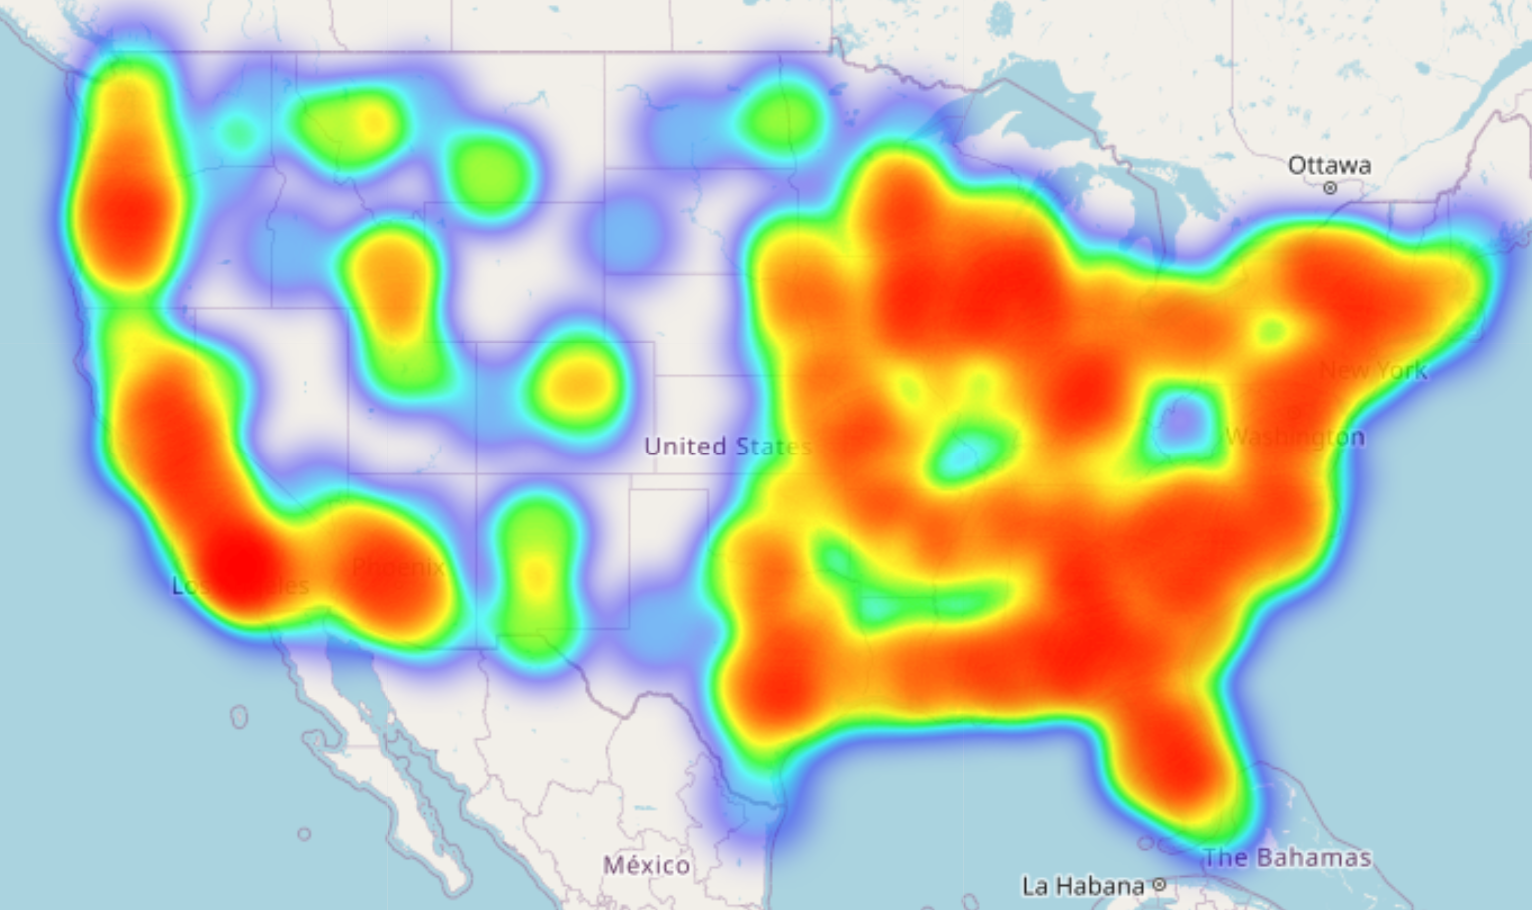

In [24]:
heat_map2 = folium.Map()
HeatMap(zip(list(df1.Start_Lat),list(df1.Start_Lng))).add_to(heat_map2)
#heat_map2  #github doesn't support embedding of folium maps, so a screenshot of the map is provided.

Image("./heatmap2.png")

These heatmaps display the distribution of accidents recorded across the mainland US. It can let us identify which severity type is more or less common in a specific city or location. One observation that can be made is that the heatmaps in San Diego, and many other cities, seem to display that there is a larger concentration of accidents in locations where highways intersect. Another observation is that by zooming out to view the entire country, at a glance, we can identify which cities have a higher concentration of a certain type of accident based on the color of the heatmap associated with that location, specifically, how dark the color red is in said location.

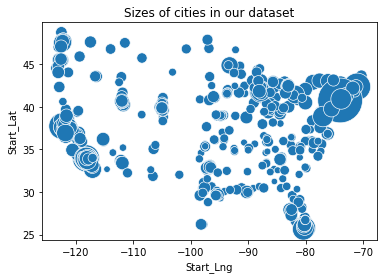

In [25]:
bubble_graph = sns.scatterplot(data=df_with_popdens, x="Start_Lng", y="Start_Lat", size="Population Density (Persons/Square Mile)", legend=False, sizes=(20, 2000)).set(title='Sizes of cities in our dataset')
bubble_graph = sns.set_theme(style="white", palette=None)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

The above bubble graph represents each circle as a city and its size is correlated to the city's population density. This can be used to get an estimate of how large the population density of one city is compared to others. New York City, San Francisco, and Los Angeles for example have the largest bubbles in the graph. This can be compared with other graphs if population density need be referenced, such graphs potentially being analyses of a certain external factor relating to car accidents in a specific city.

(0.0, 0.4)

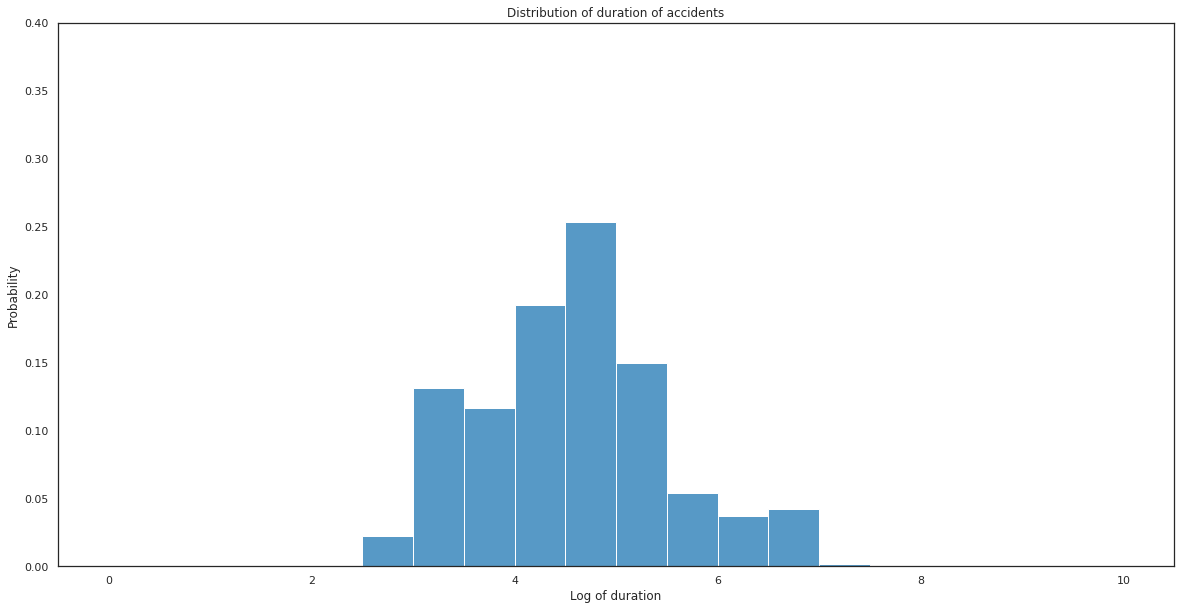

In [28]:
prop_df = df1['Duration(minutes)']
p = sns.histplot(data = np.log(prop_df), stat='probability', bins=20, binrange=(0,10)).set(xlabel = "Log of duration", title="Distribution of duration of accidents")
plt.rcParams['figure.figsize'] = [5, 5]
plt.ylim(0, 0.4)

After removing the outliers and computing the distributions we see that accidents of severity 2 tend to have a duration closer to one hour (e^4.1). We don't compute the distributions for the other 3 severities (1,3,4) since we don't have sufficient data to make accurate conclusions (dataset for severity 2 is 10x larger than the dataset for any other severity).

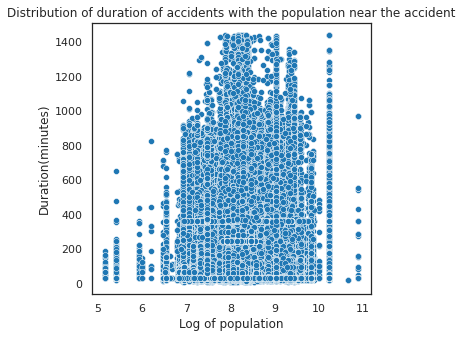

In [29]:
sns.scatterplot(x=np.log(df1['popnear']),y=df1['Duration(minutes)']).set(xlabel="Log of population", title="Distribution of duration of accidents with the population near the accident")
plt.rcParams['figure.figsize'] = [20, 10]

We observe that there seems to be a normal distribution where the longest accidents tend to occur when the population density is near the median and accident times decrease as the population density increases or decreases. Further analysis is required to determine if there are any confounding variables.

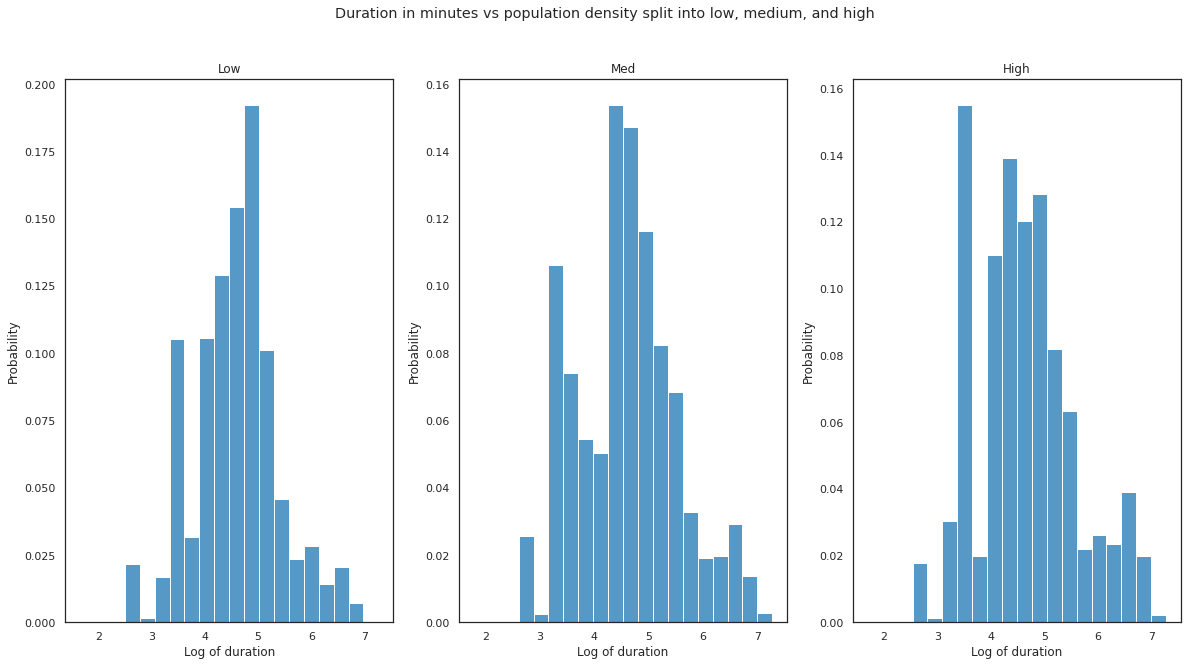

In [30]:
size = ['Low','Med','High']
fig, axs = plt.subplots(ncols=3)
fig.suptitle("Duration in minutes vs population density split into low, medium, and high")
plt.rcParams['figure.figsize'] = [20, 10]
for i, temp in enumerate(size):
    tempdf = df1[df1['rPop']==temp]['Duration(minutes)']
    sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i]).set(xlabel="Log of duration", title=temp)

We observe that the durations of accidents seems to be higher for accidents that occur in low population density areas and that the duration tends to decrease as the population density increases.

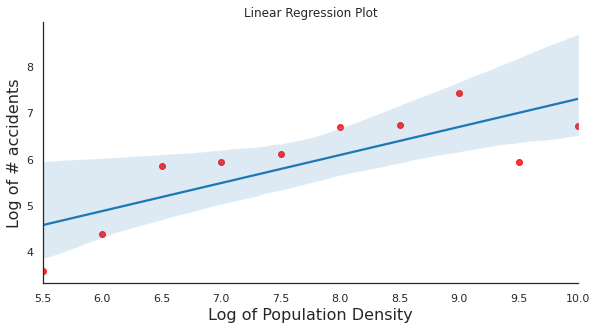

R_Squre =  0.5819666074083656


In [31]:
from sklearn.linear_model import LinearRegression

def get_df_value_counts(df1, severity):
    final_table_columns = ['State', 'City', 'Severity']
    mydf1 = df1.drop(columns=[col for col in df1 if col not in final_table_columns], inplace=False)
    #mydf1.head()

    mydf1.dropna(inplace=True)
    mask = mydf1['Severity'] == severity
    mydf1.drop(mydf1[~mask].index, inplace = True);
    
    #Top 15000 cities:
    #value_counts = mydf1.value_counts()[0:15000]
    value_counts = mydf1.value_counts()

    # converting to df and assigning new names to the columns
    df_value_counts = pd.DataFrame(value_counts)
    df_value_counts = df_value_counts.reset_index()

    columns = [x for x in list(mydf1.columns)] 
    columns.append("# of accidents")
    df_value_counts.columns = columns  # change column names
    #df_value_counts.value_counts()
    return df_value_counts

def get_ppden (row, Severity, df2):
    if row['Severity'] != Severity:
        return np.nan
    
    state_initial = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'}
    City_and_State = str(row['City']).strip() + str(', ') + str(state_initial.get(row['State'])).strip()
    #print (City_and_State)
    for index2, row2 in df2.iterrows():
        if City_and_State == str(row2['City']).strip():
            return row2['Population Density (Persons/Square Mile)']
            break

    return np.nan

def gen_counts_by_severity(Severity, df_value_counts, df2):
    tp = df_value_counts
    tp['Population Density (Persons/Square Mile)'] = [get_ppden(row, Severity, df2) for index, row in df_value_counts.iterrows() ]
    tp['Log of Population Density'] = [np.uint(np.log(x)*2.0)/2.0 for x in tp['Population Density (Persons/Square Mile)'] ]
    
    tp = tp.dropna(inplace=False)
    tp=tp.groupby('Log of Population Density').mean()
    tp.reset_index(inplace=True)

    #drop the min and max:
    min = tp['Log of Population Density'].min()
    max = tp['Log of Population Density'].max()
    tp = tp.loc[~((tp['Log of Population Density'] == min) | (tp['Log of Population Density'] == max))]

    
    tp['Log of # accidents'] = [np.log(x) for x in tp['# of accidents'] ]
    
    return tp



def regplot_counts_by_severity(Severity, df_value_counts, df2, width=18.5, heigth=10.5):
    df_value_counts_by_severity = gen_counts_by_severity(Severity, df_value_counts, df2)
    X = 'Log of Population Density'
    Y = "Log of # accidents"
    g = sns.regplot(
        x=X,
        y=Y,
        data = df_value_counts_by_severity, 
        fit_reg = True, 
        scatter_kws = {'color': 'red'},
    );
    
    plt.ylabel("Log of # accidents", size=16)
    plt.xlabel("Log of Population Density", size=16)
    plt.title('Linear Regression Plot')
    
    g.figure.set_size_inches(width, heigth)
    sns.despine()
    plt.show();
    
    #fit regression model
    model = LinearRegression()
    X, y = df_value_counts_by_severity[["Log of # accidents"]], df_value_counts_by_severity['Log of Population Density']
    model.fit(X, y)

    #display adjusted R-squared
    r_squre = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("R_Squre = ", r_squre)

    
def regplot_accident_vs_population(df1, df2, severity = 2, width=9.6, heigth=4.8):
    df_value_counts = get_df_value_counts(df1, severity)
    regplot_counts_by_severity(severity, df_value_counts, df2, width, heigth)

#draw Linear Regression Plot for severity=2:
regplot_accident_vs_population(df1, df2, severity=2)

The above graph shows that the higher the population density, the higher number of accidents and that there is a linear relationship between the log of poulation density and the log of number of accidents.

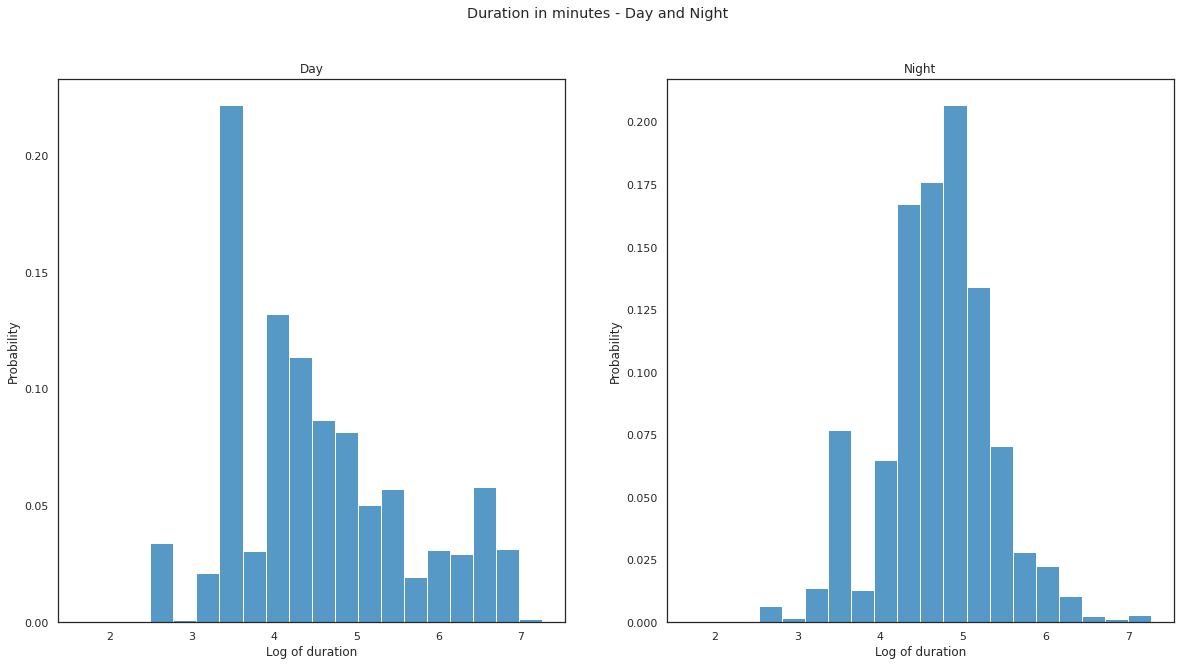

In [32]:
time = ['Day','Night']
fig, axs = plt.subplots(ncols=2)
fig.suptitle("Duration in minutes - Day and Night")
plt.rcParams['figure.figsize'] = [10, 10]
for i, temp in enumerate(time):
    tempdf = df1[df1['Sunrise_Sunset']==temp]['Duration(minutes)']
    sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i]).set(xlabel="Log of duration", title=temp)

In the two graphs above, the left graph represents the duration of an accident in minutes in respect to the probability with the time being day. The right graph represents the duration in minutes compared to probablity of accidents with the time being night. Overall the data shifts right from day to night and the probability of higher duration accidents increase dramatically. The frequency of shorter accidents is seen more during the day but at night the frequency of accidents increases as the duration increases. At night the graph shows an increase in accidents seen at night while during the day the duration is much lower. The high standard devaition shows how dispersed the graph is from day to night.

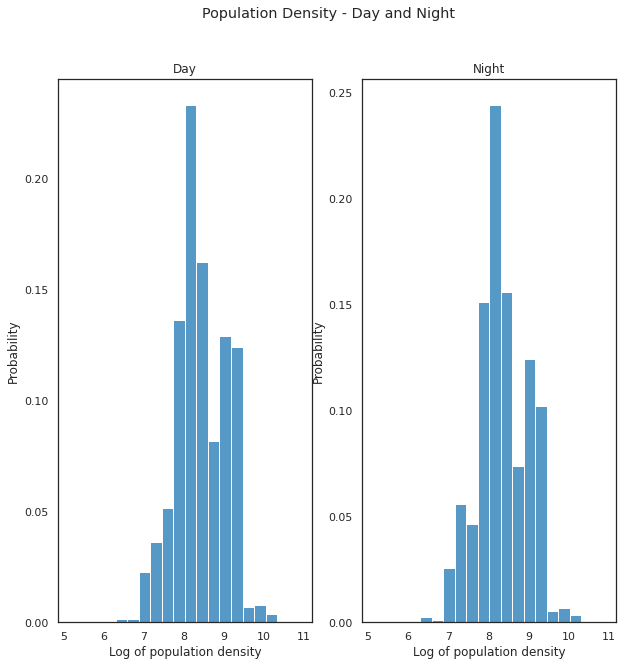

In [33]:
time = ['Day','Night']
fig, axs = plt.subplots(ncols=2)
fig.suptitle("Population Density - Day and Night")
plt.rcParams['figure.figsize'] = [25, 5]
for i, temp in enumerate(time):
    tempdf = df1[df1['Sunrise_Sunset']==temp]['popnear']
    sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i]).set(xlabel="Log of population density", title=temp)

In the two graphs above, the left graph represents the population density in respect to the probability with the time being day. The right graph represents the population density compared to probablity of accidents with the time being night. Overall the data does not seem to be signficantly different based on popualtion density. The population density seems to have no effect on frequency as well.

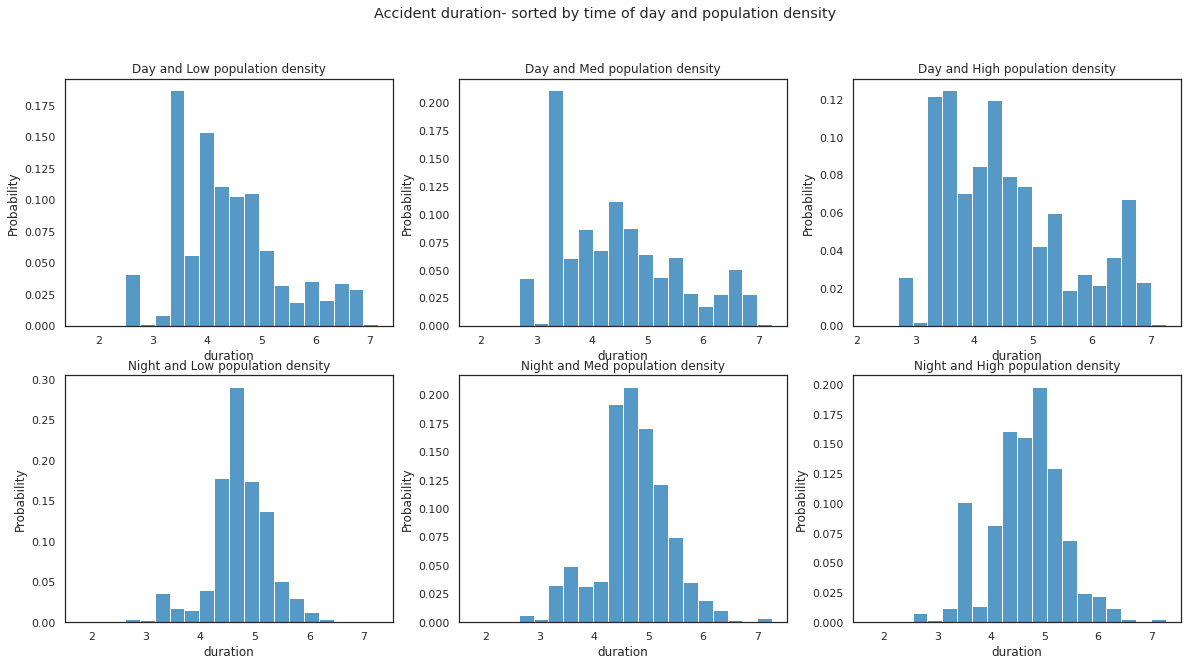

In [35]:
time = ['Day','Night']
size = ['Low','Med','High']
fig, axs = plt.subplots(ncols=3, nrows = 2)
fig.suptitle("Accident duration- sorted by time of day and population density")
plt.rcParams['figure.figsize'] = [20, 10]
for i, t in enumerate(time):
    tempdf = df1[df1['Sunrise_Sunset']==t]
    for j, temp in enumerate(size):
        tempdf2 = tempdf[tempdf['rPop']==temp]['Duration(minutes)']
        val = i*3+j
        sns.histplot(data = np.log(tempdf2), stat='probability', bins=20, ax=axs[val//3,val%3]).set(xlabel="duration", title=(t+ " and " + temp + " population density"))

In this set of graphs, we split the duration of accidents by both the population density and also the time of day. Using this metric, we see that the population density is also a contributing factor towards duration even when we account for time of day. Based on this analysis, we see that during the day time the duration of traffic accidents stayed about the same across all population densities. However, at night, the duration of traffic accidents tends to be longer when the population density is higher.

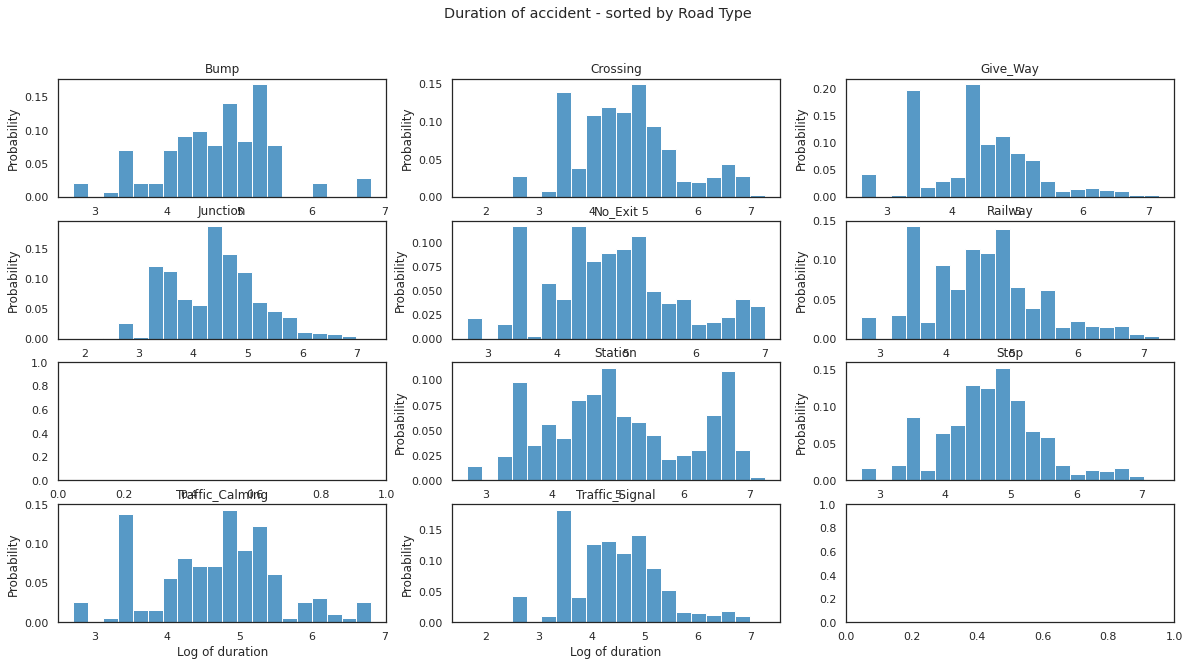

In [36]:
roads = ["Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
fig, axs = plt.subplots(ncols=3, nrows = 4)
fig.suptitle("Duration of accident - sorted by Road Type")
plt.rcParams['figure.figsize'] = [40, 30]
for i, road in enumerate(roads):
    if road == "Turning_Loop" or road== "Roundabout":
        continue
    else:
        tempdf = df1[df1[road]==1]['Duration(minutes)']
        sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i//3,i%3]).set(xlabel="Log of duration", title=road)

In the graphs above they represent the duration in minutes of an accident with respect to the probability sorted by road types. The two blank graphs are Turning loop and Roundabout in which no data was found. For Bumps, Junctions, Stations, stops,and Traffic calmings tend to shift upwards in data. This means the duration tends to be longer for these types. While Crossings, Give ways, No exits railways and Traffic sigms tend to shift slightly more to the right meaning they have higher durations. This means the duration of these accidents tends to be shorter for these ones. Overall the frequency increased for longer duratioon in Bumps, Junctions, Stations, stops,and Traffic calmings. The duration of accidents seems to increase with Bumps, junctions, stations, stops and traffic calmings.

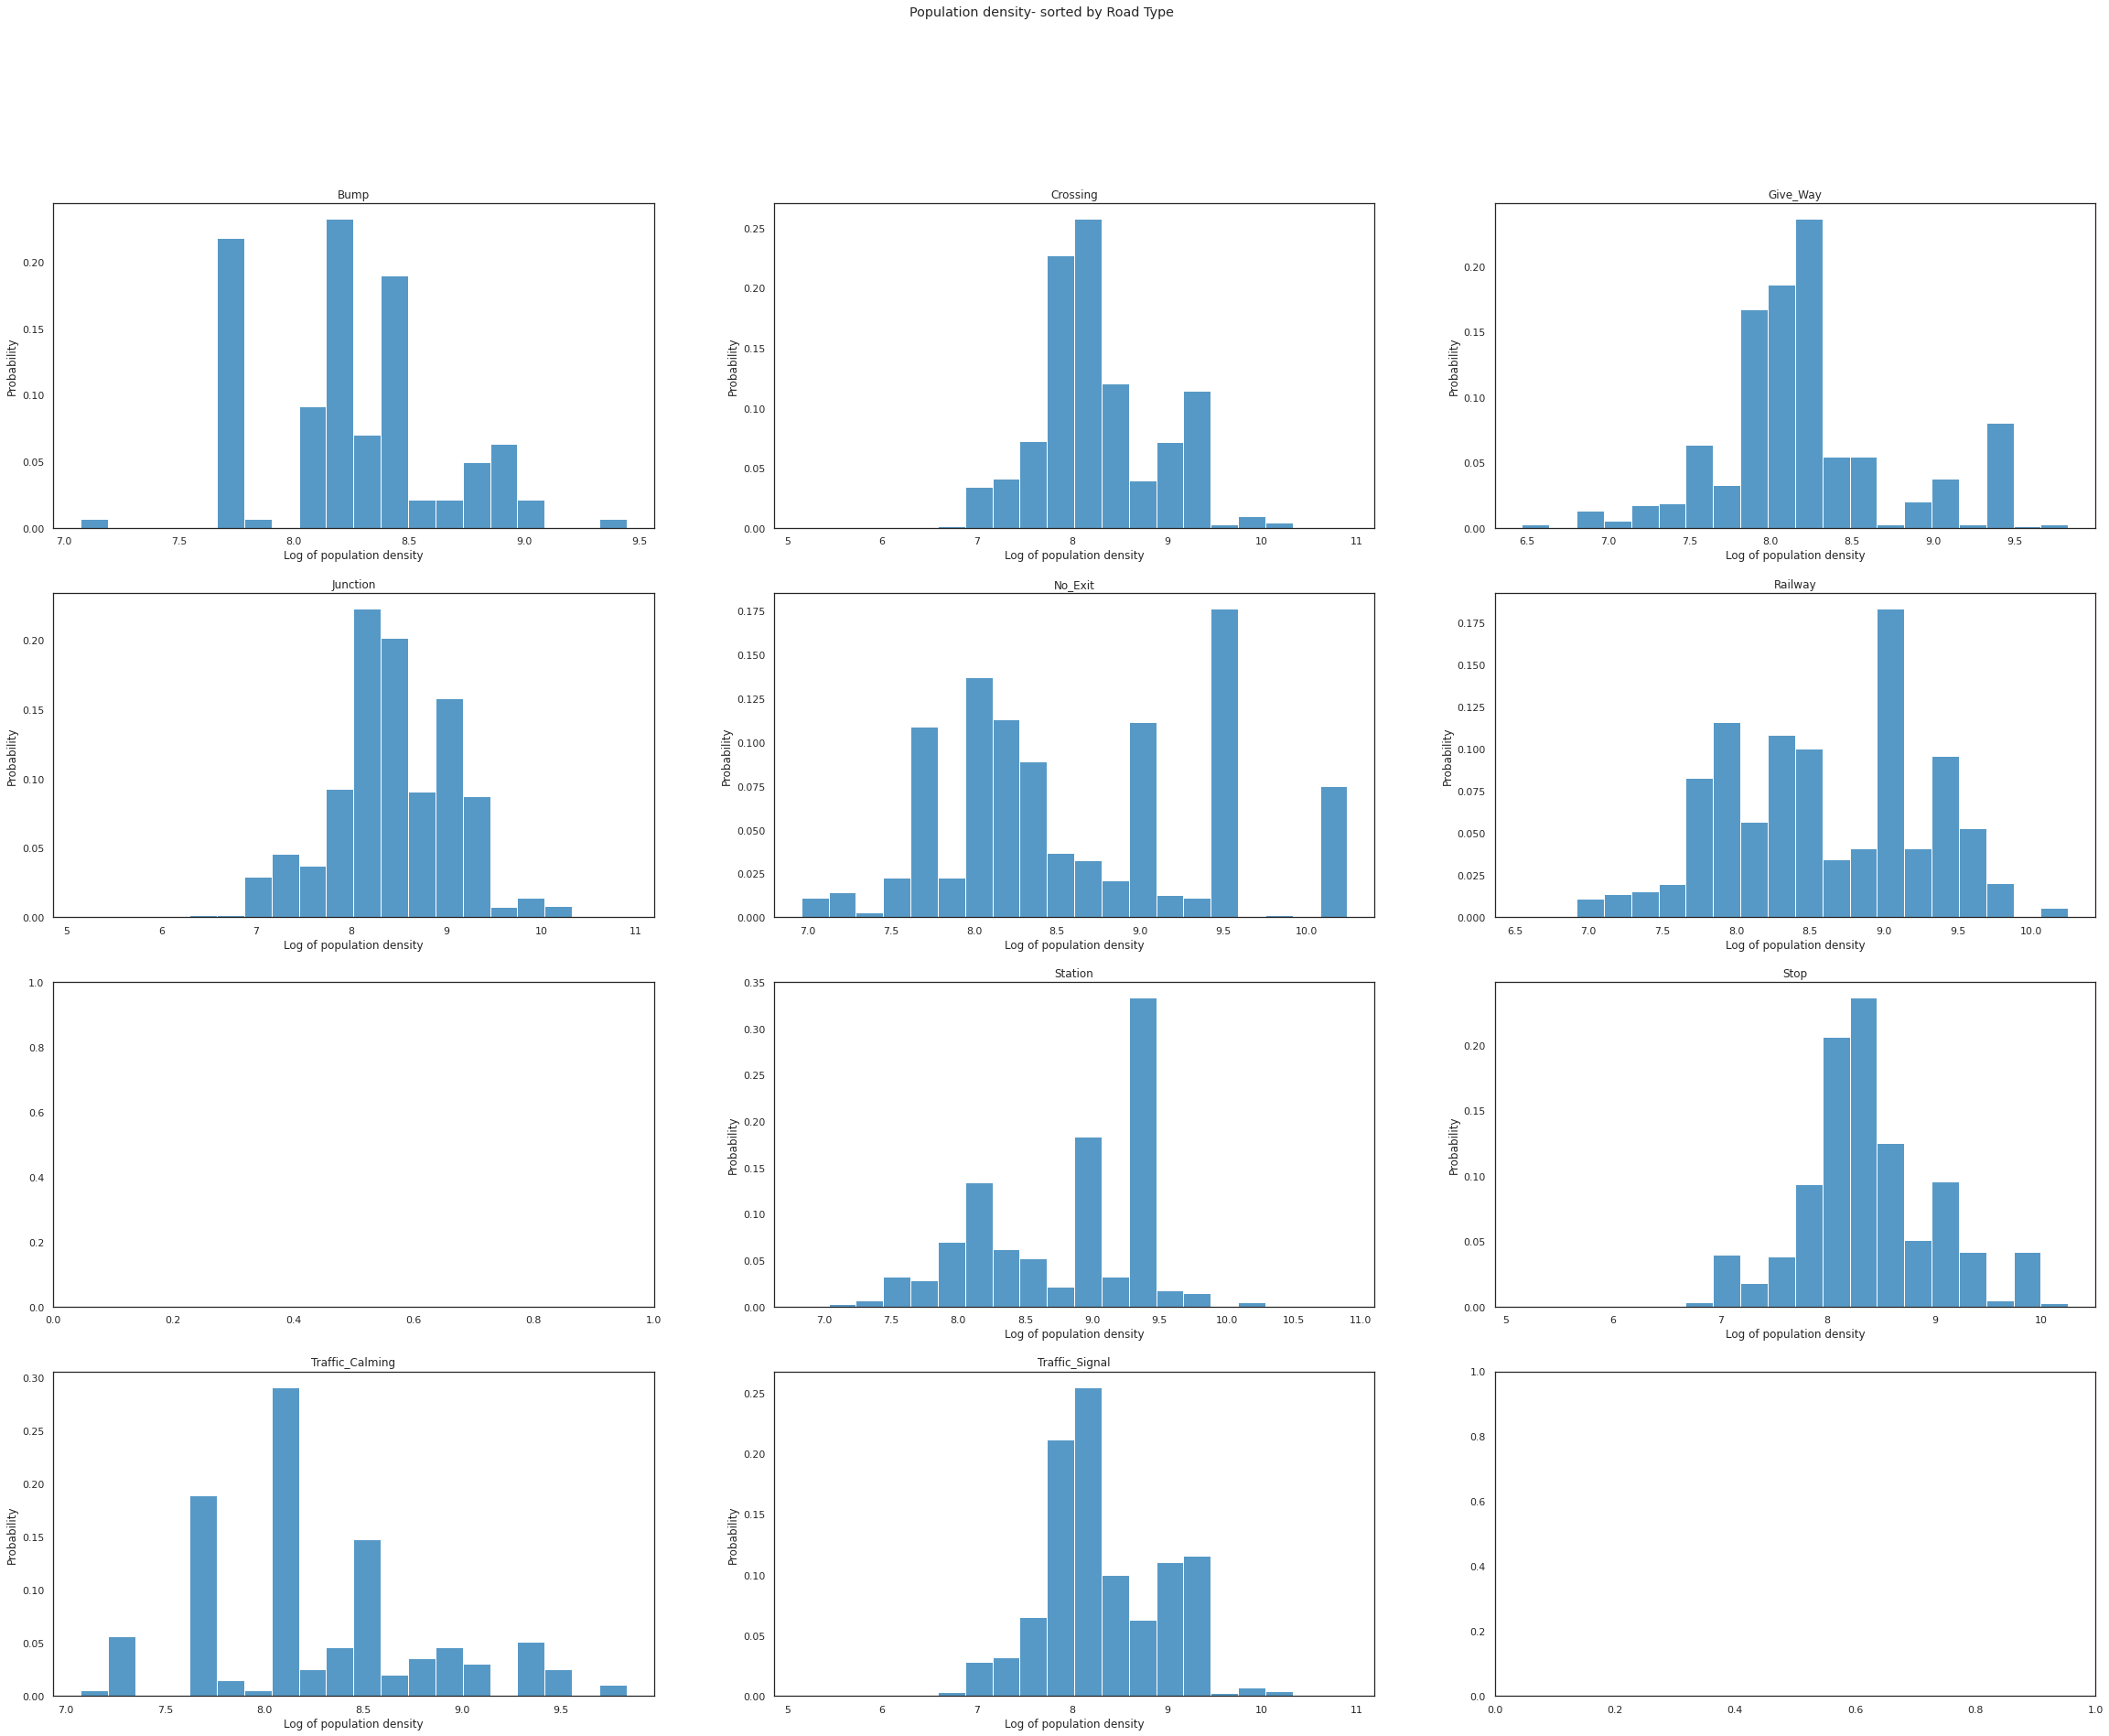

In [37]:
roads = ["Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
fig, axs = plt.subplots(ncols=3, nrows = 4)
fig.suptitle("Population density- sorted by Road Type")
plt.rcParams['figure.figsize'] = [40, 30]
for i, road in enumerate(roads):
    if road == "Turning_Loop" or road== "Roundabout":
        continue
    else:
        tempdf = df1[df1[road]==1]['popnear']
        sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i//3,i%3]).set(xlabel="Log of population density", title=road)

In the graphs above they represent the population density of an accident with respect to the probability sorted by road types. The two blank graphs are Turning loop and Roundabout in which no data was found. The road types with the longer duration accidents include Junctions and Railways. The other road types seem to all have similar frequency based on the population density.

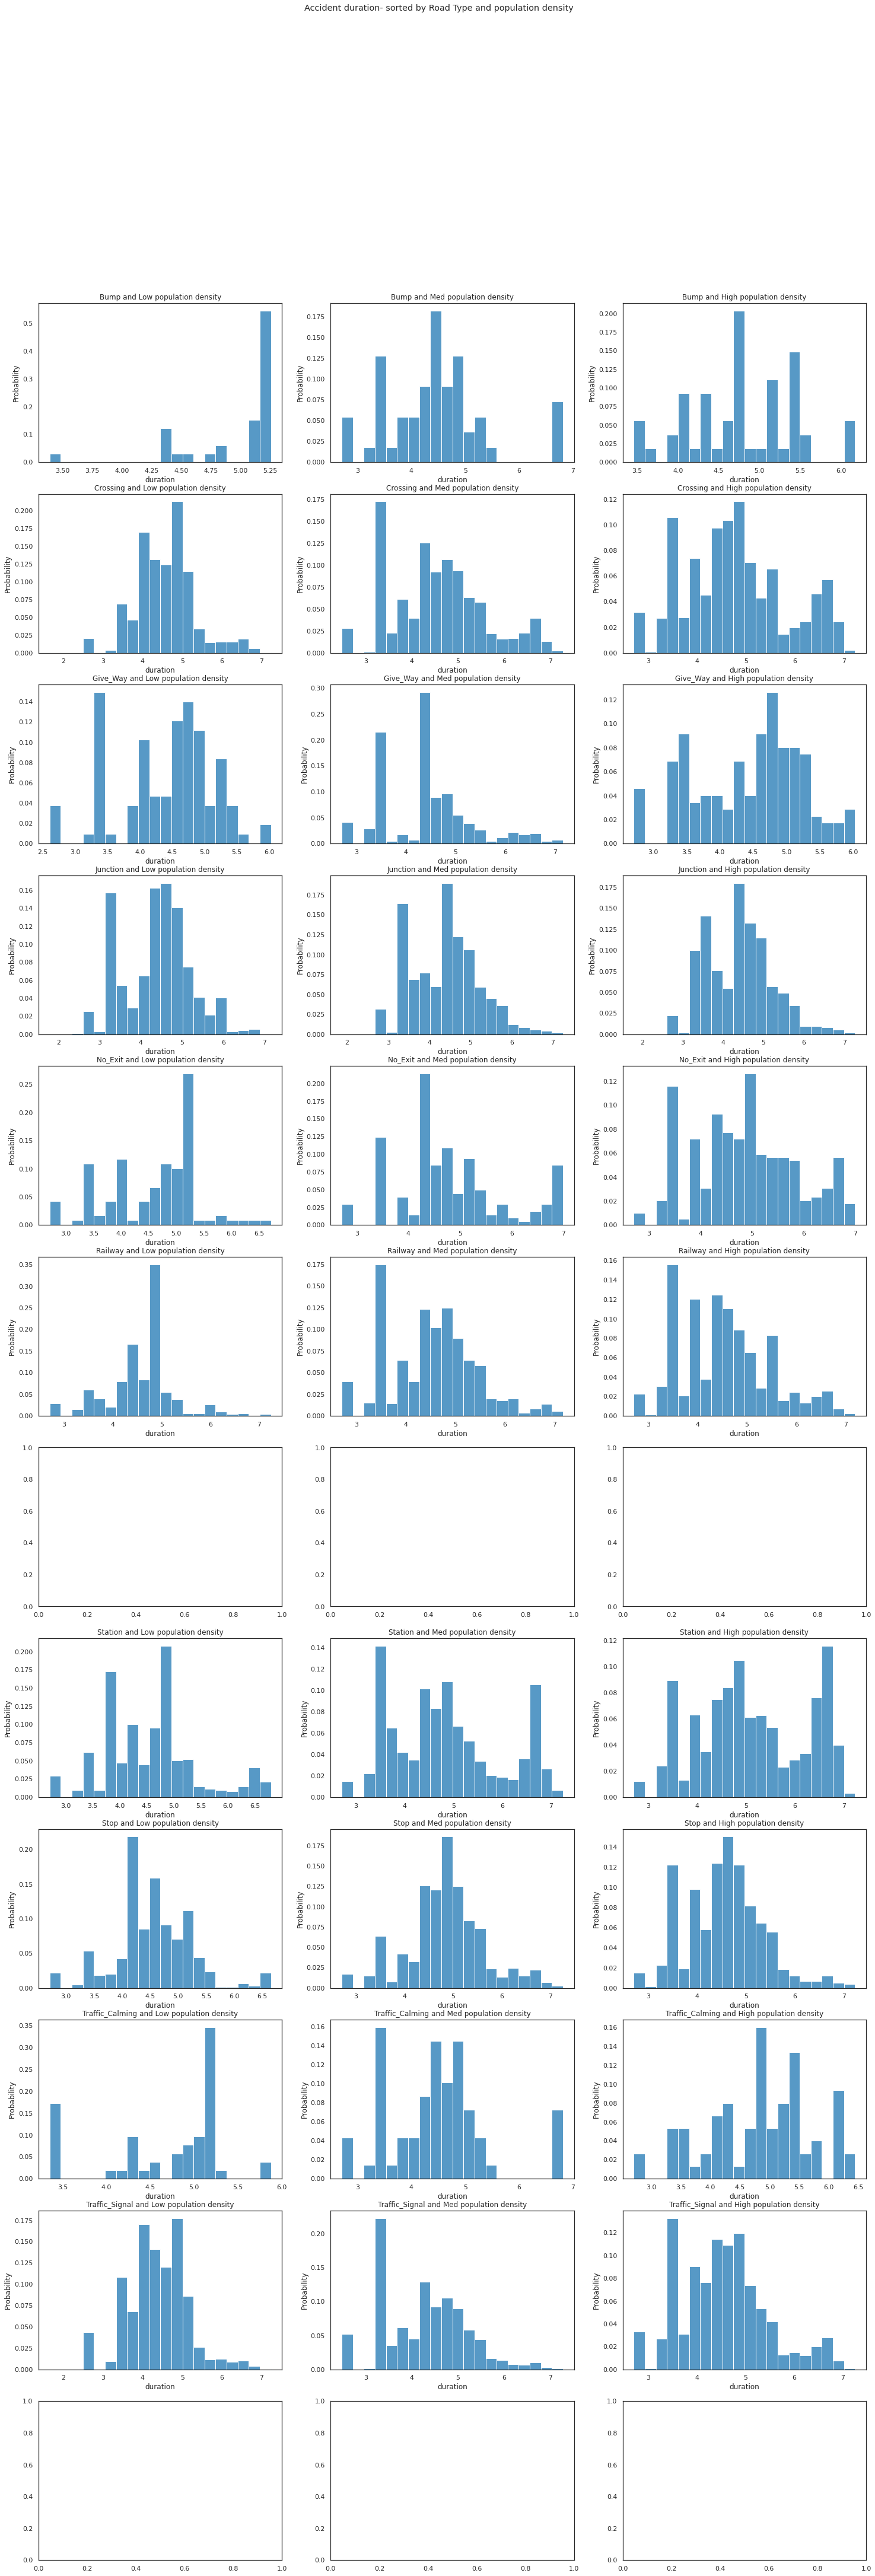

In [42]:
roads = ["Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
size = ['Low','Med','High']
fig, axs = plt.subplots(ncols=3, nrows = 12)
fig.suptitle("Accident duration- sorted by Road Type and population density")
plt.rcParams['figure.figsize'] = [25, 70]
for i, road in enumerate(roads):
    if road == "Turning_Loop" or road== "Roundabout":
        continue
    tempdf = df1[df1[road]==1]
    for j, temp in enumerate(size):
        tempdf2 = tempdf[tempdf['rPop']==temp]['Duration(minutes)']
        val = i*3+j
        sns.histplot(data = np.log(tempdf2), stat='probability', bins=20, ax=axs[val//3,val%3]).set(xlabel="duration", title=(road+ " and " + temp + " population density"))

In this set of graphs, we split the duration of accidents by both the population density and also the road type. Using this metric, we see that the population density is also a contributing factor towards duration even when we account for seperate road types. Based on this analysis, we see that in areas where the road type is station, no_exit, and give_way the duration of accidents tends to be higher in areas with high population density. In areas where the road type is railway, traffic_calming, traffic_signal, and crossing the duration of accidents tends to be lower in areas with high population density In the other weather conditions, the duration of accidents tends to be relatively the same across population densities.

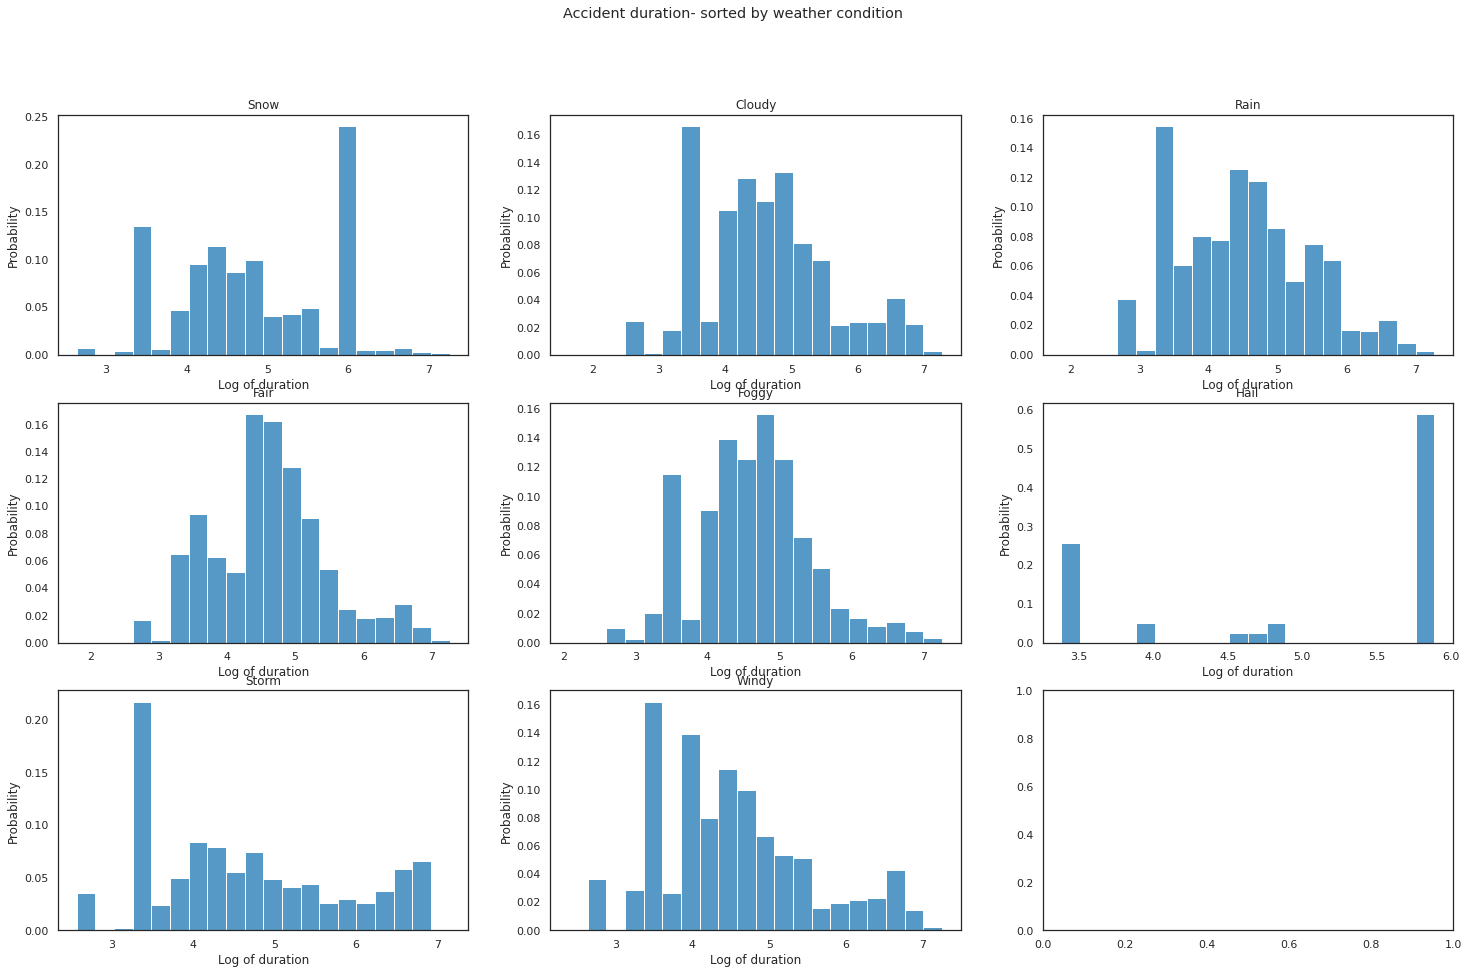

In [44]:
weatherCond = df1['Weather_Condition'].unique()
fig, axs = plt.subplots(ncols=3, nrows = 3)
fig.suptitle("Accident duration- sorted by weather condition")
plt.rcParams['figure.figsize'] = [25, 15]
for i, weather in enumerate(weatherCond):
    tempdf = df1[df1['Weather_Condition']==weather]['Duration(minutes)']
    sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i//3,i%3]).set(xlabel="Log of duration", title=weather)

The highest probability for accident duration within each type of weather condition most commonly fall under the 3-4 minute range with the second most common being just around 6 minutes. In 'Fair' normal weather, the probability of accidents occurring is more normally distributed among a 2-7 minute duration range. In weather conditions that may obscure vision such as 'Cloudy', 'Rain', 'Snow', or 'Hail', there seems to have a higher probability of an accident lasting a short 3 minutes or a long 6 minutes.

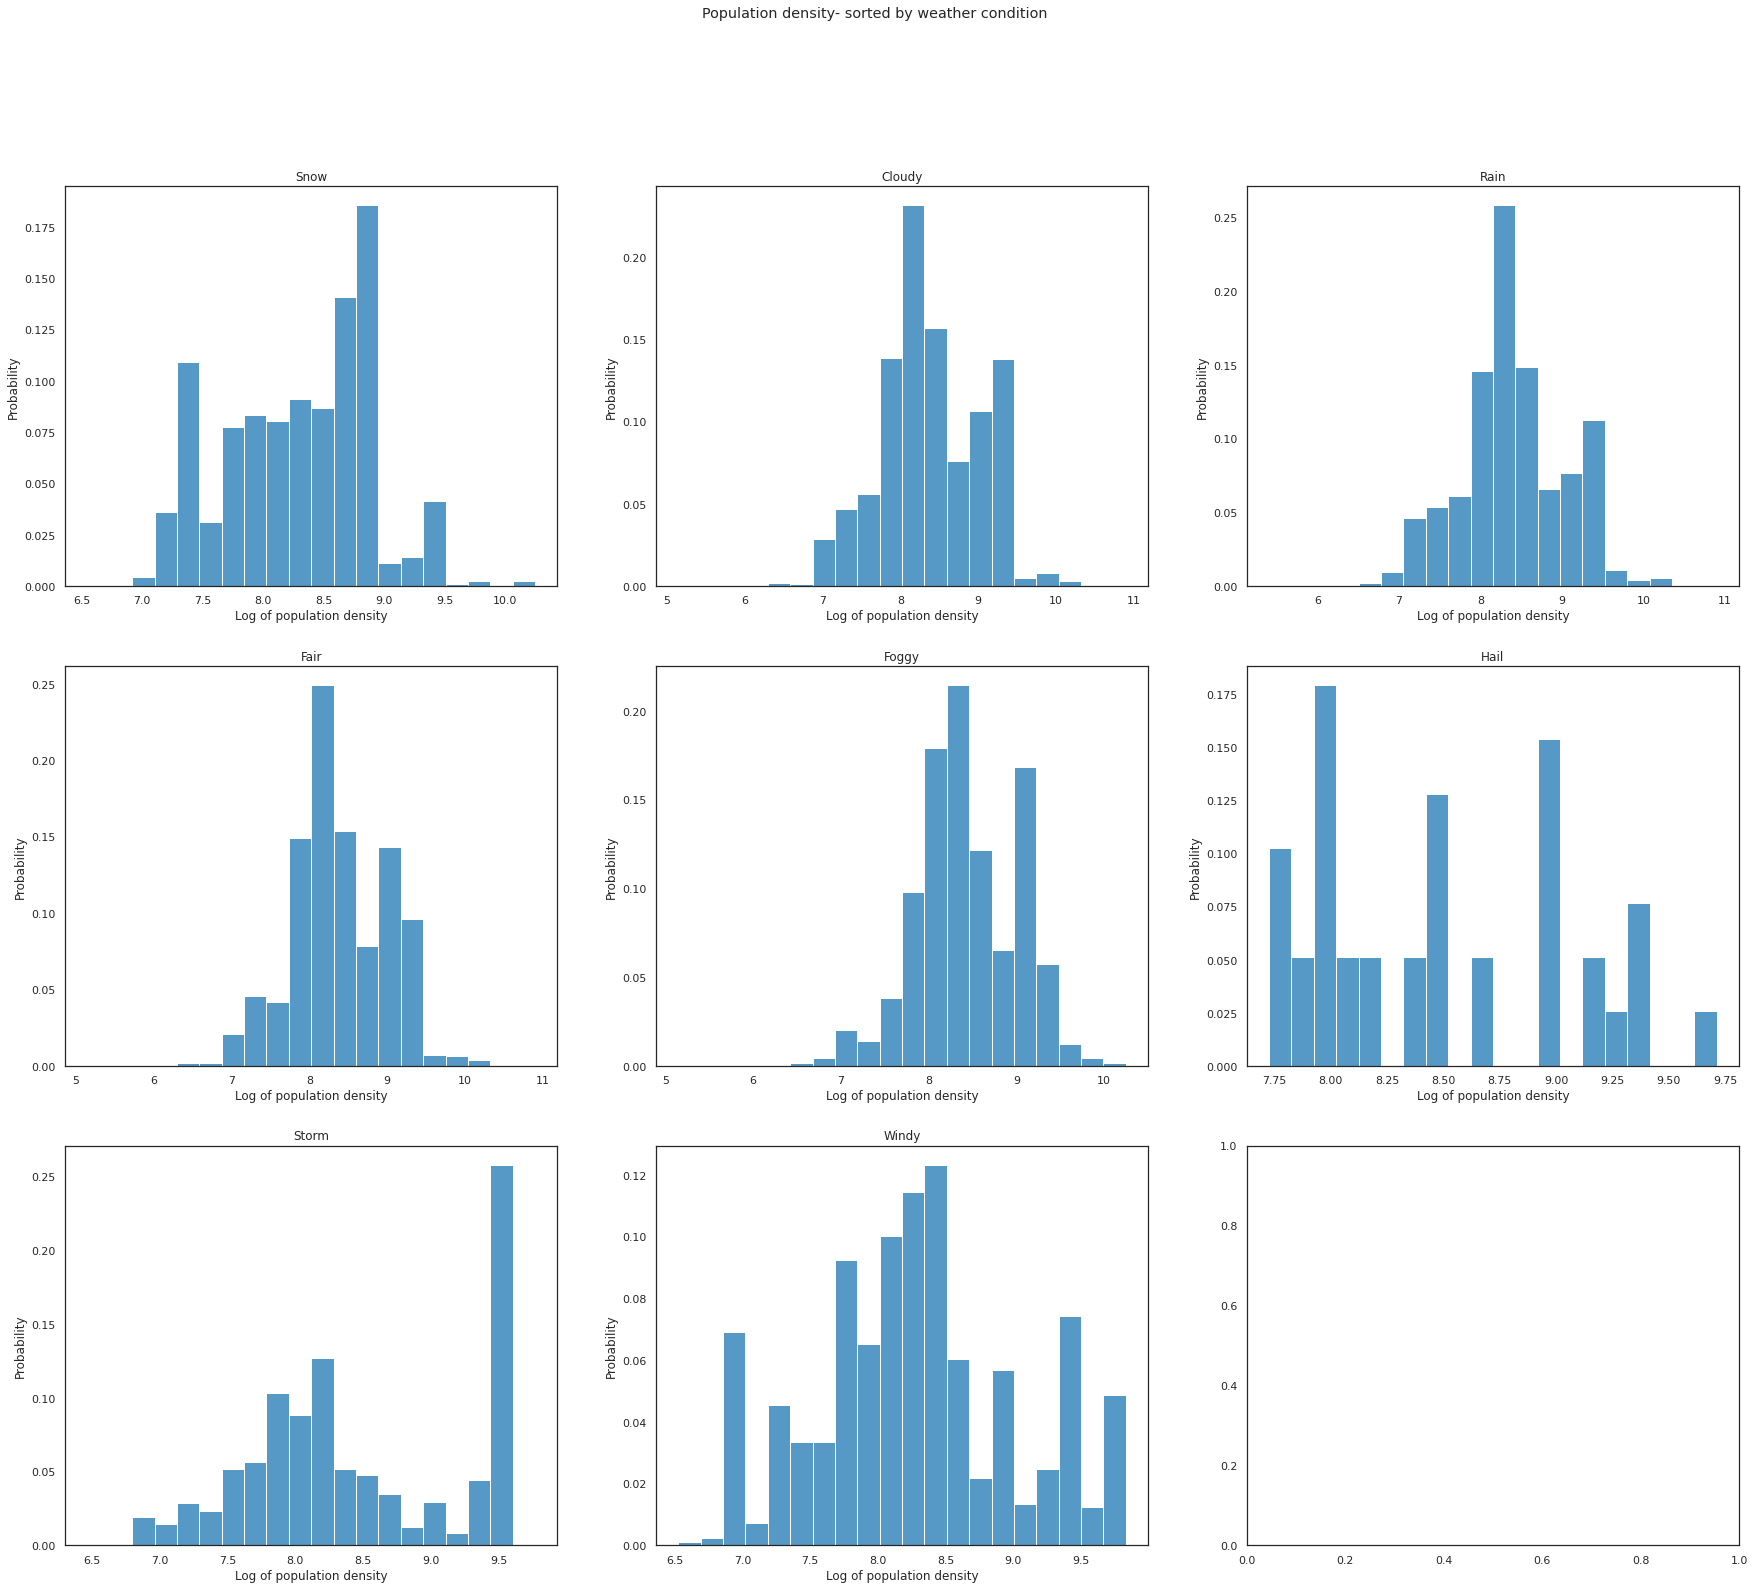

In [46]:
weatherCond = df1['Weather_Condition'].unique()
fig, axs = plt.subplots(ncols=3, nrows = 3)
fig.suptitle("Population density- sorted by weather condition")
plt.rcParams['figure.figsize'] = [30, 25]
for i, weather in enumerate(weatherCond):
    tempdf = df1[df1['Weather_Condition']==weather]['popnear']
    sns.histplot(data = np.log(tempdf), stat='probability', bins=20, ax=axs[i//3,i%3]).set(xlabel="Log of population density", title=weather)

For most of the weather conditions there is a high probability of traffic accidents happening in population values of 8-9. The one exception is during storms where there is a significantly higher probability of traffic accidents happening in highly populated areas. 'Storm' weather is more extreme than 'Rain' or 'Windy' weather so it seems that during sever weathers like storms, traffic accidents increase with the population density.

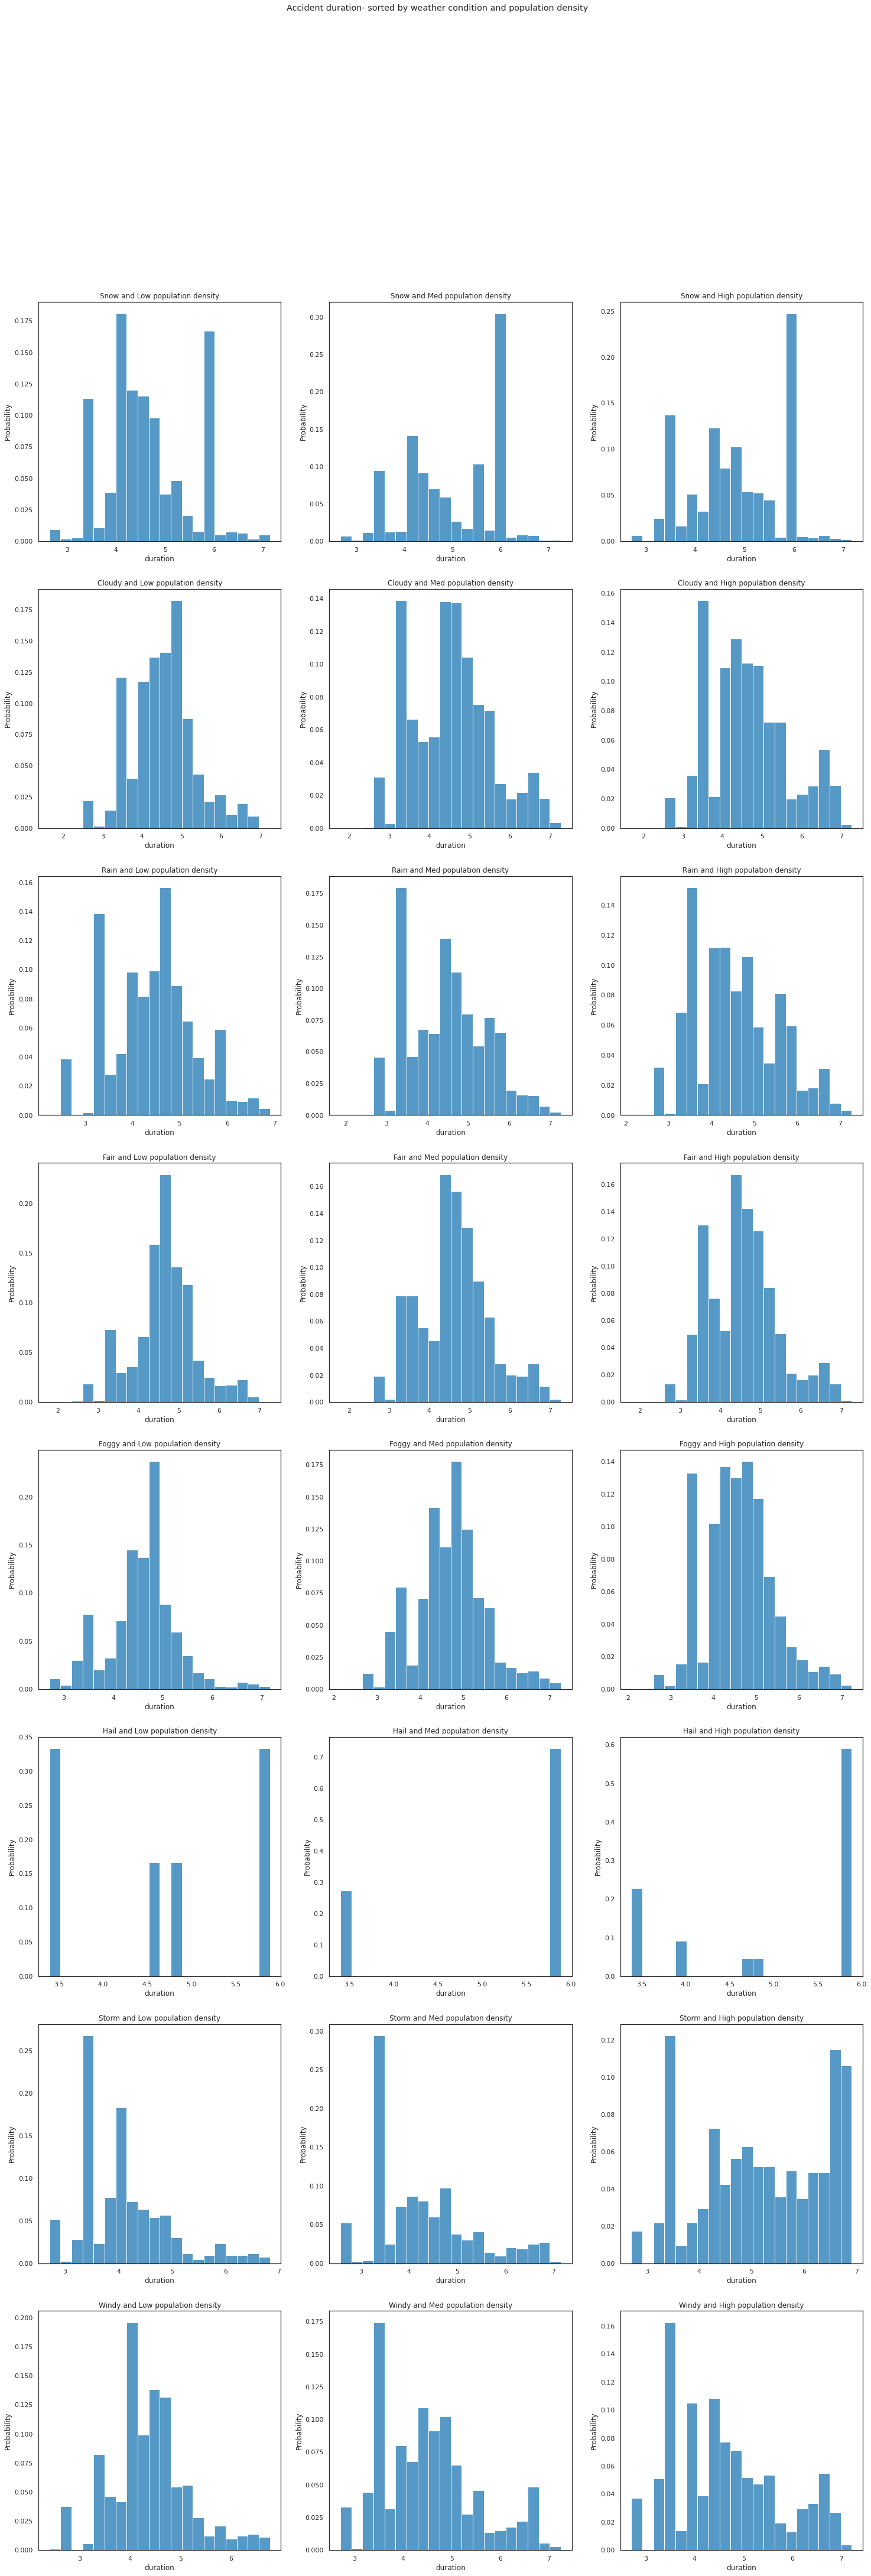

In [48]:
weatherCond = df1['Weather_Condition'].unique()
size = ['Low','Med','High']
fig, axs = plt.subplots(ncols=3, nrows = 8)
fig.suptitle("Accident duration- sorted by weather condition and population density")
plt.rcParams['figure.figsize'] = [25, 70]
for i, weather in enumerate(weatherCond):
    tempdf = df1[df1['Weather_Condition']==weather]
    for j, temp in enumerate(size):
        tempdf2 = tempdf[tempdf['rPop']==temp]['Duration(minutes)']
        val = i*3+j
        sns.histplot(data = np.log(tempdf2), stat='probability', bins=20, ax=axs[val//3,val%3]).set(xlabel="duration", title=(weather+ " and " + temp + " population density"))

In this set of graphs, we split the duration of accidents by both the population density and also the weather condition at the time. Using this metric, we see that the population density is also a contributing factor towards duration even when we account for seperate weather conditions. Based on this analysis, we see that in areas where the weather condition is stormy, foggy, or snowy, the duration of accidents tends to be higher in areas with high population density. In the other weather conditions, the duration of accidents tends to be relatively the same across population densities.

In [49]:
city_stats = df1.groupby('City')
city_stats.describe()

Severity                                    Start_Lat             \
               count mean  std  min  25%  50%  75%  max     count       mean   
City                                                                           
Akron          174.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0     174.0  41.067459   
Alameda          4.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0       4.0  37.767063   
Albany        1356.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0    1356.0  43.752353   
Albuquerque    175.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0     175.0  35.105100   
Alexandria     775.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0     775.0  38.804173   
...              ...  ...  ...  ...  ...  ...  ...  ...       ...        ...   
Yorba Linda    129.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0     129.0  33.873445   
Youngstown      14.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0      14.0  41.102977   
Yuba City      206.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0     206.0  39.083199   
Yucaipa         70.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0      70.0  34.010318   
Yuma             4.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0       4.0  32.714647   

             ... Duration(minutes)              popnear                \
             ...               75%          max   count          mean   
City         ...                                                        
Akron        ...        360.000000   542.000000   174.0   3186.000000   
Alameda      ...        175.437500   216.250000     4.0   7437.000000   
Albany       ...        240.000000  1033.933333  1356.0   3650.363569   
Albuquerque  ...        114.600000   703.500000   175.0   2979.000000   
Alexandria   ...        122.608333   836.500000   775.0  10367.000000   
...          ...               ...          ...     ...           ...   
Yorba Linda  ...        131.600000   350.300000   129.0   3503.000000   
Youngstown   ...         34.966667   360.000000    14.0   1894.000000   
Yuba City    ...        185.241667   909.000000   206.0   4585.000000   
Yucaipa      ...        159.616667   360.000000    70.0   1911.000000   
Yuma         ...         85.554167   108.266667     4.0    789.000000   

                                                                      
                    std      min      25%      50%      75%      max  
City                                                                  
Akron          0.000000   3186.0   3186.0   3186.0   3186.0   3186.0  
Alameda        0.000000   7437.0   7437.0   7437.0   7437.0   7437.0  
Albany       783.773946   1339.0   3034.0   3034.0   4587.0   4587.0  
Albuquerque    0.000000   2979.0   2979.0   2979.0   2979.0   2979.0  
Alexandria     0.000000  10367.0  10367.0  10367.0  10367.0  10367.0  
...                 ...      ...      ...      ...      ...      ...  
Yorba Linda    0.000000   3503.0   3503.0   3503.0   3503.0   3503.0  
Youngstown     0.000000   1894.0   1894.0   1894.0   1894.0   1894.0  
Yuba City      0.000000   4585.0   4585.0   4585.0   4585.0   4585.0  
Yucaipa        0.000000   1911.0   1911.0   1911.0   1911.0   1911.0  
Yuma           0.000000    789.0    789.0    789.0    789.0    789.0  

[613 rows x 216 columns]

In [50]:
weather_crit = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                   'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
std = city_stats[weather_crit].std()
mean = city_stats[weather_crit].mean()

def oddity_city(x, mean, std, weather_crit):
    temp = x['City']
    out = 0
    std_city = std.loc[temp]
    mean_city = mean.loc[temp]
    for i in range(len(weather_crit)):
        crit = weather_crit[i]
        curr = x[crit]
        out += abs(mean_city[crit]-curr)/std_city[crit]
    return out
df1['Weather_Oddity_City'] = df1.apply(oddity_city, axis=1, args=(mean,std,weather_crit))

/tmp/ipykernel_8659/3779869081.py:14: RuntimeWarning: invalid value encountered in double_scalars
  out += abs(mean_city[crit]-curr)/std_city[crit]


[Text(0.5, 0, 'weather oddity'), Text(0.5, 1.0, 'Oddity of Weather')]

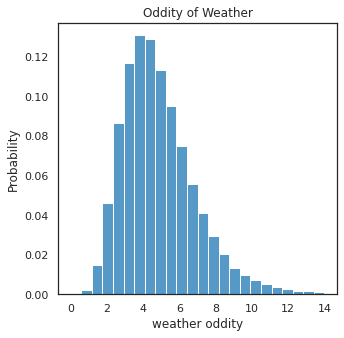

In [52]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.histplot(data = df1['Weather_Oddity_City'], stat='probability',bins=24,binrange=(0,14)).set(xlabel="weather oddity", title="Oddity of Weather")

This graph is computed according to each city's weather criteria ('Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'). Weather oddity for each city is calculated by the absolute value of the city's mean for each criteria minus actual mean all divided by the standard deviation for each city's weather criteria.

The graph forms a right skewed graph where the median centers around an weather oddity of 4. Since the mean is larger than the median and mode for a right skewed distribution, there is a higher average of traffic accidents happening at weather oddity values greater than 4. However, the probability of a traffic accident happening is the highest near a weather oddity value of 4.

# Ethics & Privacy

Our research question involves the analysis of traffic accidents using publicly available information. Our group does not foresee any issues regarding privacy or unethical use of data. No personally identifiable information can be found as the US Accidents dataset is organized by a unique identifier unattached to the person involved in an accident. Information such as driver licenses, license plates, or other data that can be linked back to a single individual is not involved in any of our datasets. The population density dataset contains official data from the 2016 U.S. Census Bureau and only includes details about population density, population, and land area, none of which violates individual privacy or is used unethically. We minimized some bias by selecting traffic accidents that belonged to cities from both datasets. This way we could analyze our data using only related data points that correspond to a city's population density. If there is any potential violation of privacy, ethics, or bias, we could look into why the data might be inappropriately used or if there is bias present.

# Conclusion & Discussion

To reiterate our project, we wanted to explore how external factors such as weather conditions, time of day, and road type would affect the duration of traffic accidents with respect to the population density of the area. Based on our background research and prior wok on this topic, we hypothesized that poor weather conditions, bad roads, and nighttime would increase the traffic delay amount of accidents when the severity level is held constant as compared to when the weather condition is good, daytime, and good roads. Further, we also reasoned that the population density of the region would affect the amount of traffic delay where accidents that occur in regions with high population density would be longer than those in low population density settings. Through our studies, we find that population density is more heavily distributed in socal and new york than other regions. Further. there are more accidents on the west and east coasts of the country than the center which matches the population density graphs where the high population density areas also have more accidents. Overall, we found that the higher the population density, the higher the number of accidents. Analyzing by weather condition, we find that the probability of a traffic accident occurring is highest for accidents that last from between 1 and 7 hours where 7 hours contains a larger amount of accidents occurring during 'Storms' or 'Stormy'. Futhermore, accidents are more probable to happen in areas of higher population density especially during 'Storms' or 'Stormy'. This forms a direct relationship with duration of each accident and the population density of that city. When we analyze accidents grouped by the weather patterns of each city, we find that the average amount of traffic accidents occur when the weather is more odd than usual. We can conclude that higher population density areas are more likely to have longer duration of traffic accidents in more odd weather. When analyzing the external factors pertaining to road types, we found that bumps, junctions, stations, stops, and traffic calmings had longer accident durations, while crossings, give ways, no exits, railways, and traffic signs had shorter accident durations. Additionally, with regards to the population density, overall junctions and railways had longer accident durations. Data about Turning loops and roundabouts was not available. When analyzing the data by the time of day, we found that traffic delays tended to be longer when the population density is higher.
One limitation of our project was that we narrowed our data down to focus on severity 2 accidents, accidents that wouldn't be considered as minor (a bump or scrape) but more along the lines of a car crash with minor injuries. This was done because we observed that severity 2 accidents constituted 85% of the overall traffic, and since our hypothesis mentions analysing the populations of a single severity, we ignored the other severities and doubled down on severity 2. Another limitation was that our data for accidents was restricted to just the mainland us, meaning we do not have data about Alaska or Hawaii, and cities within those states were not accounted for in our analysis, if they had been included, our analysis would account for the US as a whole rather than just the mainland. Lastly many data points were lost in certain analyses due to their city not being included in the limited amount of cities with a corresponding population density in the second dataset.
This project's aim was to try to pinpoint the specific factors that lead to car accidents and how they impacted the duration of the accident with the hope that these factors are known and avoided to increase the safety of roads, and furthermore a decrease in injuries and fatalities due to accidents in the United States.


# Team Contributions

- Edward: Found Data, Data Cleaning, Data Analysis, EDA, Conclusion & Discussion
- Nick: Found Data, Data Cleaning, Data Analysis, EDA, Conclusion & Discussion
- Alan: Found Data, Data Cleaning, Data Analysis, EDA, Conclusion & Discussion
- Derek: Found Data, Data Cleaning, Data Analysis, EDA, Conclusion & Discussion
- Kurtis: Found Data, Data Cleaning, Data Analysis, EDA, Conclusion & Discussion